In [ ]:
pip install japanize-matplotlib

In [39]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

In [41]:
ims_df = pd.read_csv("/content/sample_pandas_6.csv")
ims_df.head()

,発注日,商品番号,商品名,単価,在庫,注文数
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24


In [42]:
def tax(x):
  return x * 1.10
ims_df['単価'].apply(tax)

,単価
0,858.0
1,99.0
2,858.0
3,660.0
4,660.0
...,...
195,660.0
196,99.0
197,363.0
198,462.0


In [43]:
type(ims_df['発注日'].loc[0])

str

In [46]:
ims_df['発注日'] = pd.to_datetime(ims_df['発注日'])
type(pd.to_datetime(df['発注日'].loc[0]))

pandas._libs.tslibs.timestamps.Timestamp

In [48]:
tax_series = df['単価'].apply(tax)
tax_series.name = "単価(税込み)"
pd.concat([ims_df, tax_series], axis=1 )

,発注日,商品番号,商品名,単価,在庫,注文数,単価(税込み)
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,858.0
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12,99.0
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,858.0
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24,660.0
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24,660.0
...,...,...,...,...,...,...,...
195,2021-08-02,1QJFO8QY,商品サンプル 1QJFO8QY,600,10,42,660.0
196,2019-05-28,X0ZE2ZMY,商品サンプル X0ZE2ZMY,90,45,30,99.0
197,2015-06-22,48XMJXKO,商品サンプル 48XMJXKO,330,50,36,363.0
198,2022-08-29,QRMOGNUU,商品サンプル QRMOGNUU,420,40,48,462.0


In [37]:
category_df = pd.read_csv('/content/category.csv')
category_df.head()

,商品番号,カテゴリー
0,YY4HAAZR,弁当
1,Z4WOOIYV,飲料水
2,1QJFO8QY,弁当
3,MESUDVWQ,菓子類
4,S6RE8W6X,図書・新聞


In [49]:
df = pd.merge(ims_df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')
df

,発注日,商品番号,商品名,単価,在庫,注文数,カテゴリー
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12,飲料水
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,弁当
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24,弁当
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24,弁当
...,...,...,...,...,...,...,...
195,2021-08-02,1QJFO8QY,商品サンプル 1QJFO8QY,600,10,42,弁当
196,2019-05-28,X0ZE2ZMY,商品サンプル X0ZE2ZMY,90,45,30,飲料水
197,2015-06-22,48XMJXKO,商品サンプル 48XMJXKO,330,50,36,デザート
198,2022-08-29,QRMOGNUU,商品サンプル QRMOGNUU,420,40,48,雑貨


In [50]:
df['カテゴリー'].value_counts()

,count
カテゴリー,
弁当,49
菓子類,38
飲料水,36
デザート,30
雑貨,27
図書・新聞,20


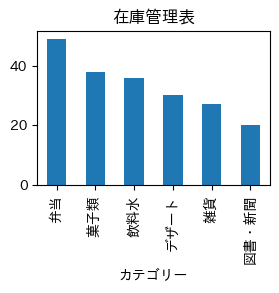

In [68]:
category_counts = df['カテゴリー'].value_counts()

plt.figure(figsize=(3, 2))
ax = category_counts.plot(kind='bar')
plt.title("在庫管理表")
plt.show(ax)

In [78]:
# カテゴリーごとの注文数量を集計
df.groupby('カテゴリー')['注文数'].sum()

,注文数
カテゴリー,
デザート,804
図書・新聞,666
弁当,1668
菓子類,1272
雑貨,894
飲料水,894


In [71]:
df.groupby('カテゴリー')['注文数'].describe()

,count,mean,std,min,25%,50%,75%,max
カテゴリー,,,,,,,,
デザート,30.0,26.800000,19.021585,0.0,12.0,24.0,42.0,60.0
図書・新聞,20.0,33.300000,21.631118,0.0,12.0,39.0,54.0,60.0
弁当,49.0,34.040816,18.223107,0.0,18.0,36.0,48.0,60.0
菓子類,38.0,33.473684,20.293438,0.0,18.0,42.0,48.0,60.0
雑貨,27.0,33.111111,16.588535,6.0,21.0,36.0,48.0,60.0
飲料水,36.0,24.833333,20.138804,0.0,6.0,24.0,42.0,60.0
